In [4]:
import csv, cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
index = 0
max_dist = 200
data_location = r'D:/MinecraftBot/Data/'

image_path = data_location + 'Unannotated/image_{}.png'.format(str(index).zfill(6))
csv_path = data_location + 'Annotations/annotation_{}.csv'.format(str(index).zfill(6))

(-0.5, 2559.5, 1368.5, -0.5)

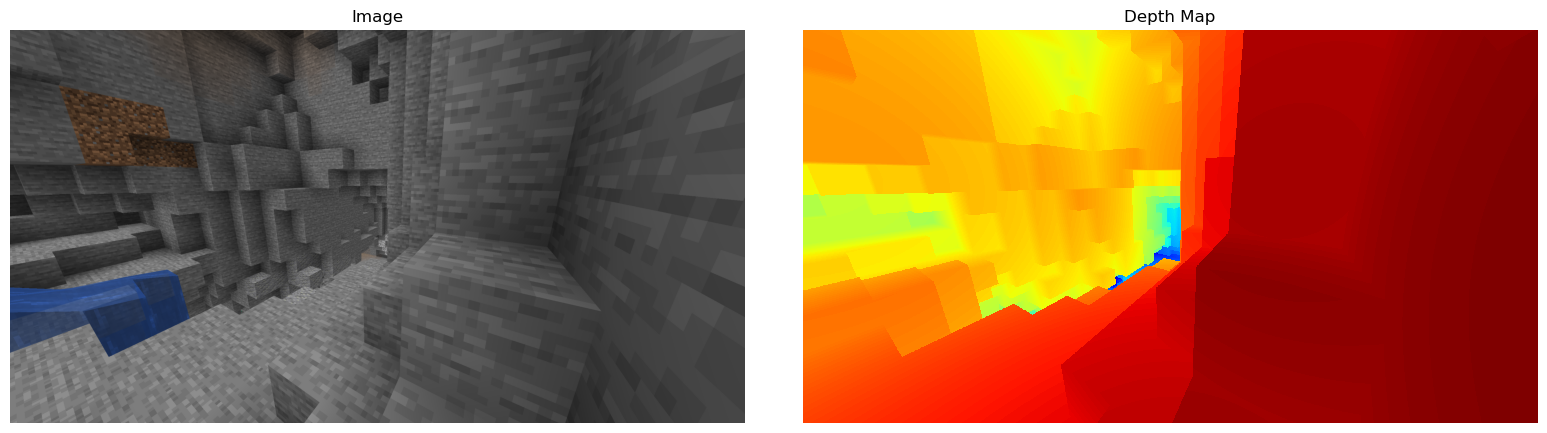

In [6]:
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

with open(csv_path, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    rows = list(csv_reader)
    distances = [float(row[1]) for row in rows]

heatmap = np.array(distances).reshape(height, width)
heatmap[heatmap < 0] = 200

heatmap = np.max(heatmap) - heatmap

fig, ax = plt.subplots(1, 2, figsize=(16, 16))
fig.tight_layout()

ax[0].set_title('Image')
ax[0].imshow(img)
ax[0].axis('off')

ax[1].set_title('Depth Map')
ax[1].imshow(heatmap, cmap='jet', interpolation='nearest')
ax[1].axis('off')